## Importing Libraries

In [5]:
import folium                                 # visualization
import geopandas as gpd                        # data analysis and manipulation
import glob                                   # data access
import json                                   # JSON encoder and decoder
import matplotlib.pyplot as plt               # create visualizations
import numpy as np                            # scientific computing
import os                                     # data access
from datetime import date                     # dates, times and intervals
from folium import plugins                    # visualization
from scripts.credential import username_landsat, password_landsat, username_sentinel, password_sentinel
from scripts.download_imagery import DownloadImagery
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt  # interface to Open Access Hub
from shapely.geometry import Polygon, Point
from zipfile import ZipFile                   # file management
import pandas as pd
import time                                   # time assessment


## Reading Area of Interest

<Axes: >

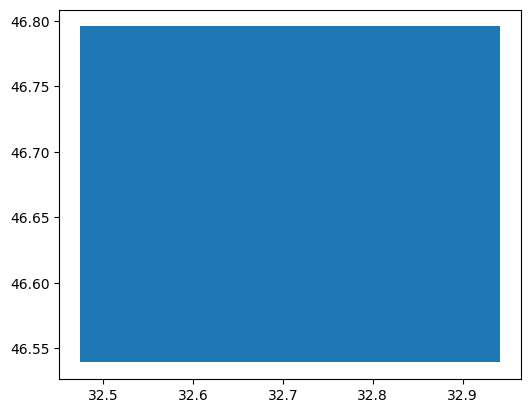

In [6]:
geom = gpd.read_file('../raw_data/flooded_areas.gpkg', layer = 'flooded_kherson')
geom.plot()

## Downloading Sentinel Imagery

In [7]:
sentinel_gdf = DownloadImagery.search_sentinel(username = username_sentinel,
                                                password = password_sentinel,
                                                boundary= geom,
                                                start_date= '20200101',  #'20230520',
                                                end_date= '20200601', #'20230620',
                                                max_cloud_cover= 5)

In [8]:
sentinel_gdf

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,...,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry,contains
13c56caf-4d73-46cc-8260-2af61031dc09,S2A_MSIL2A_20200125T085241_N0213_R107_T36TVS_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-01-25T08:52:41.024Z, Instrument: MS...",false,2020-01-25 08:52:41.024,2020-01-25 08:52:41.024,2020-01-25 16:16:34.670,23985,...,GS2A_20200125T085241_023985_N02.13,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200125T085241_N0213_R107_T36TVS_2...,13c56caf-4d73-46cc-8260-2af61031dc09,"MULTIPOLYGON (((31.70900 45.95826, 33.12597 45...",True
874cec0a-a36b-4fa6-af29-ef177fda5937,S2B_MSIL2A_20200409T084559_N0214_R107_T36TVS_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-04-09T08:45:59.024Z, Instrument: MS...",false,2020-04-09 08:45:59.024,2020-04-09 08:45:59.024,2020-04-09 22:48:54.306,16149,...,GS2B_20200409T084559_016149_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200409T084559_N0214_R107_T36TVS_2...,874cec0a-a36b-4fa6-af29-ef177fda5937,"MULTIPOLYGON (((31.70900 45.95826, 33.12597 45...",True
85e02b36-5550-451f-beff-45a87bce2849,S2B_MSIL2A_20200519T084559_N0214_R107_T36TVS_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-05-19T08:45:59.024Z, Instrument: MS...",false,2020-05-19 08:45:59.024,2020-05-19 08:45:59.024,2020-05-20 00:08:13.930,16721,...,GS2B_20200519T084559_016721_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200519T084559_N0214_R107_T36TVS_2...,85e02b36-5550-451f-beff-45a87bce2849,"MULTIPOLYGON (((31.70900 45.95826, 33.12597 45...",True


<Axes: >

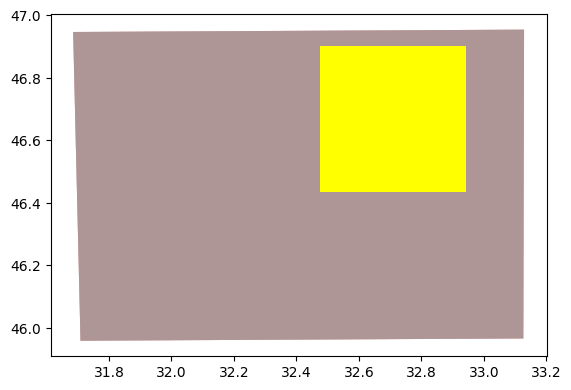

In [9]:
ax = sentinel_gdf.plot('platformidentifier',
                    alpha = 0.5,
                    cmap = 'Set1',
                    #legend = True
                     )
geom.plot(ax=ax)

square_geom = DownloadImagery.create_square_bbox(geom['geometry'])

square_geom.plot(ax=ax, color = 'yellow')

In [10]:
DownloadImagery.download_sentinel(username = username_sentinel,
                                password = password_sentinel,
                                gdf = sentinel_gdf,
                                idx = 0,
                                bound_crs= square_geom)

Unzipping images
Unzipping completed.


{'id': '13c56caf-4d73-46cc-8260-2af61031dc09',
 'title': 'S2A_MSIL2A_20200125T085241_N0213_R107_T36TVS_20200125T114313',
 'size': 1080751401,
 'md5': '9f8f2ffc4187ca359bc50261003849e9',
 'date': datetime.datetime(2020, 1, 25, 8, 52, 41, 24000),
 'footprint': 'POLYGON((31.68543924708906 46.946162221065514,33.12826694512443 46.95363733424615,33.12596726307574 45.96548172662488,31.70899987025029 45.958258688896564,31.68543924708906 46.946162221065514))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('13c56caf-4d73-46cc-8260-2af61031dc09')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2020, 1, 25, 16, 17, 14, 773000),
 'Ingestion Date': datetime.datetime(2020, 1, 25, 16, 16, 34, 670000),
 'manifest_name': 'manifest.safe',
 'product_root_dir': 'S2A_MSIL2A_20200125T085241_N0213_R107_T36TVS_20200125T114313.SAFE',
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('13c56caf-4d73-46cc-8260-2af61031dc09')/Products('Quicklook')/$value",
 'path': 

## Downloading Landsat imagery

In [5]:
centroidx, centroidy = geom.centroid.x, geom.centroid.y

C:\Users\rodri\AppData\Local\Temp\ipykernel_21768\1844159588.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroidx, centroidy = geom.centroid.x, geom.centroid.y
C:\Users\rodri\AppData\Local\Temp\ipykernel_21768\1844159588.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroidx, centroidy = geom.centroid.x, geom.centroid.y


In [6]:
landsat_search = DownloadImagery.search_landast(lat = centroidy[0],
                               long = centroidx[0],
                               start_date = '2023-05-20', 
                               end_date = '2023-06-20',
                               dataset='landsat_ot_c2_l2', 
                               max_cloud_cover=30)

8 scenes found.


In [7]:
landsat_search

,cloud_cover,entity_id,display_id,ordering_id,landsat_product_id,landsat_scene_id,acquisition_date,collection_category,collection_number,wrs_path,...,corner_lower_right_latitude,corner_lower_right_longitude,has_customized_metadata,options,selected,spatial_bounds,spatial_coverage,temporal_coverage,publish_date,geometry
0,27,LC91780282023169LGN00,LC09_L2SP_178028_20230618_20230620_02_T1,None,LC09_L1TP_178028_20230618_20230618_02_T1,LC91780282023169LGN00,2023-06-18,2023-07-01,2,178,...,44.94254,35.14211,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(32.17911, 44.95323, 35.20709, 47.08946)","POLYGON ((32.17911 45.38061, 34.53682 44.95323...","[2023-06-18 00:00:00, 2023-06-18 00:00:00]",2023-06-19 23:25:58-05:00,"POLYGON ((32.17911 45.38061, 34.53682 44.95323..."
1,6,LC81790272023168LGN00,LC08_L2SP_179027_20230617_20230623_02_T1,None,LC08_L1TP_179027_20230617_20230623_02_T1,LC81790272023168LGN00,2023-06-17,2023-07-01,2,179,...,46.36282,34.23368,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(31.15435, 46.36901, 34.27195, 48.51251)","POLYGON ((31.15435 46.80589, 33.57115 46.36901...","[2023-06-17 00:00:00, 2023-06-17 00:00:00]",2023-06-23 00:45:48-05:00,"POLYGON ((31.15435 46.80589, 33.57115 46.36901..."
2,4,LC81790282023168LGN00,LC08_L2SP_179028_20230617_20230623_02_T1,None,LC08_L1TP_179028_20230617_20230623_02_T1,LC81790282023168LGN00,2023-06-17,2023-07-01,2,179,...,44.94989,33.66680,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(30.6585, 44.95226, 33.68665, 47.09115)","POLYGON ((30.6585 45.38224, 33.01614 44.95226,...","[2023-06-17 00:00:00, 2023-06-17 00:00:00]",2023-06-23 00:44:36-05:00,"POLYGON ((30.65850 45.38224, 33.01614 44.95226..."
3,2,LC91790272023160LGN00,LC09_L2SP_179027_20230609_20230611_02_T1,None,LC09_L1TP_179027_20230609_20230610_02_T1,LC91790272023160LGN00,2023-06-09,2023-07-01,2,179,...,46.36641,34.14796,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(31.06915, 46.37124, 34.18426, 48.51054)","POLYGON ((31.06915 46.80355, 33.48655 46.37124...","[2023-06-09 00:00:00, 2023-06-09 00:00:00]",2023-06-10 23:50:20-05:00,"POLYGON ((31.06915 46.80355, 33.48655 46.37124..."
4,14,LC91790282023160LGN00,LC09_L2SP_179028_20230609_20230611_02_T1,None,LC09_L1TP_179028_20230609_20230610_02_T1,LC91790282023160LGN00,2023-06-09,2023-07-01,2,179,...,44.95033,33.58694,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(30.57594, 44.95405, 33.60158, 47.0888)","POLYGON ((30.57594 45.37953, 32.9341 44.95405,...","[2023-06-09 00:00:00, 2023-06-09 00:00:00]",2023-06-10 23:48:21-05:00,"POLYGON ((30.57594 45.37953, 32.93410 44.95405..."
5,16,LC91780282023153LGN00,LC09_L2SP_178028_20230602_20230604_02_T1,None,LC09_L1TP_178028_20230602_20230602_02_T1,LC91780282023153LGN00,2023-06-02,2023-07-01,2,178,...,44.94353,35.08891,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(32.12664, 44.9544, 35.1524, 47.08915)","POLYGON ((32.12664 45.37994, 34.48485 44.9544,...","[2023-06-02 00:00:00, 2023-06-02 00:00:00]",2023-06-04 00:19:17-05:00,"POLYGON ((32.12664 45.37994, 34.48485 44.95440..."
6,3,LC81790272023152LGN00,LC08_L2SP_179027_20230601_20230607_02_T1,None,LC08_L1TP_179027_20230601_20230607_02_T1,LC81790272023152LGN00,2023-06-01,2023-07-01,2,179,...,46.36274,34.24148,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(31.16167, 46.36892, 34.27944, 48.51241)","POLYGON ((31.16167 46.80583, 33.57862 46.36892...","[2023-06-01 00:00:00, 2023-06-01 00:00:00]",2023-06-07 05:43:19-05:00,"POLYGON ((31.16167 46.80583, 33.57862 46.36892..."
7,1,LC81790282023152LGN00,LC08_L2SP_179028_20230601_20230607_02_T1,None,LC08_L1TP_179028_20230601

<Axes: >

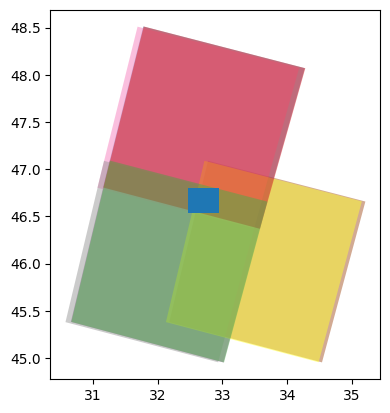

In [12]:
ax = landsat_search.plot('entity_id',
                    alpha = 0.5,
                    cmap = 'Set1',
                    #legend = True
                     )
geom.plot(ax=ax)

In [13]:
for i in landsat_search['entity_id']:
    try:
        DownloadImagery.download_landsat(username = username_landsat,
                                 password = password_landsat,
                                 id = i,
                                 output_dir = f'.././output/{i}')
    except:
        print(f'Not possible to download {i}.')
        pass

Not possible to download LC91780282023169LGN00.
Not possible to download LC81790272023168LGN00.
Not possible to download LC81790282023168LGN00.
Not possible to download LC91790272023160LGN00.
Not possible to download LC91790282023160LGN00.
Not possible to download LC91780282023153LGN00.
Not possible to download LC81790272023152LGN00.
Not possible to download LC81790282023152LGN00.
